Plot metrics vs non-dimentional numbers from scaling scheme
======

In [1]:
from math import *

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors

%matplotlib inline

from netCDF4 import Dataset

import numpy as np

import os

import pandas as pd

import pylab as pl

import scipy.io

import scipy as spy

import seaborn as sns

import sys

#lib_path = os.path.abspath('../../Building_canyon/BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts
lib_path = os.path.abspath('../BuildCanyon/PythonModulesMITgcm') # Add absolute path to my python scripts

sys.path.append(lib_path)

import ReadOutTools_MITgcm as rout
import MetricsPythonTools as mpt


/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


## Functions

In [2]:
def get_metrics(exp, run, TrNum, key):
    '''Get column from a tracer metrics pandas dataframe using the key name, run (01, 02, etc) and experiment
    abreviated name (BAR, CNTDIFF, 3DDIFF, NOGMREDI). All input variables are strings. Returns the desired column from the dataframe'''
    df = pd.read_csv(('results/metricsDataFrames/%srun%sTr%s.csv' %(exp,run,TrNum)))
    col = df[key]
    return col

def get_water(exp, run, key):
    '''Get column from a tracer metrics pandas dataframe using the key name, run (01, 02, etc) and experiment
    abreviated name (BAR, CNTDIFF, 3DDIFF, NOGMREDI). All input variables are strings. Returns the desired column from the dataframe'''
    df = pd.read_csv(('results/metricsDataFrames/%srun%s.csv' %(exp,run)))
    col = df[key]
    return col

def get_column(file, key):
    '''Get column from a tracer metrics pandas dataframe using the key name and file name and path. All input 
    variables are strings. Returns the desired column from the dataframe'''
    df = pd.read_csv(file)
    col = df[key]
    return col



## Loading files and general input

In [3]:
#Exp
CGrid = '/Users/Karina/Research/PhD/Tracers/TemporaryData/BARKLEY/run01/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
#CGrid = '/ocean/kramosmu/MITgcm/TracerExperiments/CNTDIFF/run03/gridGlob.nc' # Smallest volume grid, closed bdy, no canyon.
CGridOut = Dataset(CGrid)

# General input
nx = 360
ny = 360
nz = 90
nt = 19 # t dimension size

rc = CGridOut.variables['RC']
xc = rout.getField(CGrid, 'XC') # x coords tracer cells
yc = rout.getField(CGrid, 'YC') # y coords tracer cells

drF = CGridOut.variables['drF'] # vertical distance between faces
drC = CGridOut.variables['drC'] # vertical distance between centers

dxC = CGridOut.variables['dxC'] # vertical distance between faces
dyC = CGridOut.variables['dyC'] # vertical distance between centers


In [4]:
labels = [#'Kv=1E-5, Ki=10',
          'Kv=1E-5, Ki=1,N=5.5E-3',
          #'Kv=1E-5, Ki=0.1',
          'Kv=KTv=KSv=1E-4, Ki=1', #  11
          'Kv=KTv=KSv=1E-3, Ki=1,Kt=Ks',# 12
          'Kv=1E-5, Ki=1,N=3.9E-3',# 14
          'Kv=1E-5, Ki=1,N=6.3E-3',# 15
          'Kv=1E-5, Ki=1,N=3.0E-3',# 16
          'Kv=1E-7, Ki=1,KTv=KSv=1E-7',# 17
          'Kv=1E-5, f = 7.7E-5',# 18
          'Kv=1E-5, f = 4.8E-5',# 19
          #'Kv=3.8E-5, Ki=1',# 20
          #'Kv=2.8E-5, Ki=1',# 21
          'Kv=1E-7(out), 1E-3(in), Ki=1',# 3D 04
          'Kv=1E-7(out), 1E-4(in), Ki=1', # 3D 05
          'Kv=1E-5(out), 1E-3(in), Ki=1',# 3D 06
          'Kv=1E-5(out), 1E-4(in), Ki=1']# 3D 07

          
         
runs = ['03','11','12','14','15','16','17','18','19','04','05','06','07']

runsNoC = ['07','24','25','26','27','28','30','22','23','30','30','07','07']
# corresponding no canyon runs

times = np.arange(0,nt,1)



In [5]:
# LOAD AREAS
CS1A = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS1area' )
CS2A = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS2area' )
CS3A = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS3area' )
CS3sbA = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS3sbarea' )
CS4A = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS4area' )
CS5A = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'CS5area' )
AS1A = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'AS1area' )
AS2A = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'AS2area' )
LID1A = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'LID1area' )
LID2A = get_column('results/metricsDataFrames/Canyon_AreasVolumes.csv', 'LID2area' )


In [6]:
tracers_3D = ['04','05','06','07'] #run number because there's only 1 tr per run

tracers_CNT =['1','2','3','1','1','1','3','1','1']
#               03  , 11,  12,   14,    15,   16,   17,   18,   19   
    
tracers_NoC =['1','1','1','1','1','1','1','1','1','1','1','1','1']
#               03  , 24,  25,   26,    27,   28,  30,   22,   23   07     07    07    07

numTr = len(tracers_NoC) # number of tracers in total 

# LOAD TRANSPORTS
CS1 = np.zeros((nt-1,numTr))
CS2 = np.zeros((nt-1,numTr))
CS3 = np.zeros((nt-1,numTr))
CS4 = np.zeros((nt-1,numTr))
CS5 = np.zeros((nt-1,numTr))
CS3sb = np.zeros((nt-1,numTr))
AS1 = np.zeros((nt-1,numTr))
AS2 = np.zeros((nt-1,numTr))
LID1 = np.zeros((nt-1,numTr))
LID2 = np.zeros((nt-1,numTr))

CS1a = np.zeros((nt-1,numTr))
CS2a = np.zeros((nt-1,numTr))
CS3a = np.zeros((nt-1,numTr))
CS4a = np.zeros((nt-1,numTr))
CS5a = np.zeros((nt-1,numTr))
CS3sba = np.zeros((nt-1,numTr))
AS1a = np.zeros((nt-1,numTr))
AS2a = np.zeros((nt-1,numTr))
LID1a = np.zeros((nt-1,numTr))
LID2a = np.zeros((nt-1,numTr))

CS1d = np.zeros((nt-1,numTr))
CS2d = np.zeros((nt-1,numTr))
CS3d = np.zeros((nt-1,numTr))
CS4d = np.zeros((nt-1,numTr))
CS5d = np.zeros((nt-1,numTr))
CS3sbd = np.zeros((nt-1,numTr))
AS1d = np.zeros((nt-1,numTr))
AS2d = np.zeros((nt-1,numTr))
LID1d = np.zeros((nt-1,numTr))
LID2d = np.zeros((nt-1,numTr))

CS1NoC = np.zeros((nt-1,numTr))
CS2NoC = np.zeros((nt-1,numTr))
CS3NoC = np.zeros((nt-1,numTr))
CS4NoC = np.zeros((nt-1,numTr))
CS5NoC = np.zeros((nt-1,numTr))
CS3sbNoC = np.zeros((nt-1,numTr))
AS1NoC = np.zeros((nt-1,numTr))
AS2NoC = np.zeros((nt-1,numTr))
LID1NoC = np.zeros((nt-1,numTr))
LID2NoC = np.zeros((nt-1,numTr))

CS1aNoC = np.zeros((nt-1,numTr))
CS2aNoC = np.zeros((nt-1,numTr))
CS3aNoC = np.zeros((nt-1,numTr))
CS4aNoC = np.zeros((nt-1,numTr))
CS5aNoC = np.zeros((nt-1,numTr))
CS3sbaNoC = np.zeros((nt-1,numTr))
AS1aNoC = np.zeros((nt-1,numTr))
AS2aNoC = np.zeros((nt-1,numTr))
LID1aNoC = np.zeros((nt-1,numTr))
LID2aNoC = np.zeros((nt-1,numTr))

CS1dNoC = np.zeros((nt-1,numTr))
CS2dNoC = np.zeros((nt-1,numTr))
CS3dNoC = np.zeros((nt-1,numTr))
CS4dNoC = np.zeros((nt-1,numTr))
CS5dNoC = np.zeros((nt-1,numTr))
CS3sbdNoC = np.zeros((nt-1,numTr))
AS1dNoC = np.zeros((nt-1,numTr))
AS2dNoC = np.zeros((nt-1,numTr))
LID1dNoC = np.zeros((nt-1,numTr))
LID2dNoC = np.zeros((nt-1,numTr))


kk = 0

fields = ['CS1','CS2','CS3','CS3sb','CS4','CS5','AS1' ,'AS2','LID1' ,'LID2']
fieldsDiff = ['CS1','CS2','CS3','CS3sb','CS4','CS5','AS1' ,'AS2','LID1' ,'LID2','LID1i' ,'LID2i']

for jj,ii in zip(runs,tracers_CNT):

    CS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[0] )
    CS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[1] )
    CS3a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[2] )
    CS3sba[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[3] )
    CS4a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[4] )
    CS5a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[5] )
    AS1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[6] )
    AS2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[7] )
    LID1a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[8] )
    LID2a[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[9] )

    CS1d[:,kk] =  get_metrics('CNTDIFF_CS_DIFFFLUX_', jj,ii,  fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii, fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii, fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii,  fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii,  fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii,  fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii,  fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii,  fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii, fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii, fieldsDiff[11] ))

    kk=kk+1


for ii in tracers_3D:

    CS1a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[0] )
    CS2a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[1] )
    CS3a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[2] )
    CS3sba[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[3] )
    CS4a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[4] )
    CS5a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[5] )
    AS1a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[6] )
    AS2a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[7] )
    LID1a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[8] )
    LID2a[:,kk] = get_metrics('3DDIFF_CS_ADVFLUX_', ii, '1', fields[9] )

    CS1d[:,kk] =  get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[0] )
    CS2d[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[1] )
    CS3d[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[2] )
    CS3sbd[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[3] )
    CS4d[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[4] )
    CS5d[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[5] )
    AS1d[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[6] )
    AS2d[:,kk] = get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[7] )
    LID1d[:,kk] = (get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[8] )
                  +get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[10] ))
    LID2d[:,kk] = (get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[9] )
                  +get_metrics('3DDIFF_CS_DIFFFLUX_', ii, '1', fieldsDiff[11] ))

    kk=kk+1



CS1 = CS1a + CS1d
CS2 = CS2a + CS2d
CS3 = CS3a + CS3d
CS4 = CS4a + CS4d
CS5 = CS5a + CS5d
CS3sb = CS3sba + CS3sbd
AS1 = AS1a + AS1d
AS2 = AS2a + AS2d
LID1 = LID1a+ LID1d
LID2 = LID2a +LID2d


# -------------------------------------NO Canyon--------------------------------------------
kk=0
for jj,ii in zip(runsNoC,tracers_NoC):

    CS1aNoC[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[0] )
    CS2aNoC[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[1] )
    CS3aNoC[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[2] )
    CS3sbaNoC[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[3] )
    CS4aNoC[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[4] )
    CS5aNoC[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[5] )
    AS1aNoC[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[6] )
    AS2aNoC[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[7] )
    LID1aNoC[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[8] )
    LID2aNoC[:,kk] = get_metrics('CNTDIFF_CS_ADVFLUX_', jj, ii, fields[9] )

    CS1dNoC[:,kk] =  get_metrics('CNTDIFF_CS_DIFFFLUX_', jj,ii,  fieldsDiff[0] )
    CS2dNoC[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii, fieldsDiff[1] )
    CS3dNoC[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii, fieldsDiff[2] )
    CS3sbdNoC[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii,  fieldsDiff[3] )
    CS4dNoC[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii,  fieldsDiff[4] )
    CS5dNoC[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii,  fieldsDiff[5] )
    AS1dNoC[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii,  fieldsDiff[6] )
    AS2dNoC[:,kk] = get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii,  fieldsDiff[7] )
    LID1dNoC[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii, fieldsDiff[8] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii, fieldsDiff[10] ))
    LID2dNoC[:,kk] = (get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii, fieldsDiff[9] )
                  +get_metrics('CNTDIFF_CS_DIFFFLUX_', jj, ii, fieldsDiff[11] ))

    kk=kk+1

In [7]:
#  LOAD WATER TRANSPORT

water_3D = ['04','05','06','07'] #run number because there's only 1 tr per run

water_CNT =['03'  , '11',  '12',   '14',    '15',   '16',   '17',   '18',   '19'   ]
#               03  , 11,  12,   14,    15,   16,   17,   18,   19   
    
water_NoC =['07','24','25','26','27','28','30','22','23','30','30','07','07']
#               03  , 24,  25,   26,    27,   28,  30,   22,   23   07     07    07    07

numWat = len(water_NoC)

wCS1 = np.zeros((nt-1,numWat))
wCS2 = np.zeros((nt-1,numWat))
wCS3 = np.zeros((nt-1,numWat))
wCS4 = np.zeros((nt-1,numWat))
wCS5 = np.zeros((nt-1,numWat))
wCS3sb = np.zeros((nt-1,numWat))
wAS1 = np.zeros((nt-1,numWat))
wAS2 = np.zeros((nt-1,numWat))
wLID1 = np.zeros((nt-1,numWat))
wLID2 = np.zeros((nt-1,numWat))

wCS1NoC = np.zeros((nt-1,numWat))
wCS2NoC = np.zeros((nt-1,numWat))
wCS3NoC = np.zeros((nt-1,numWat))
wCS4NoC = np.zeros((nt-1,numWat))
wCS5NoC = np.zeros((nt-1,numWat))
wCS3sbNoC = np.zeros((nt-1,numWat))
wAS1NoC = np.zeros((nt-1,numWat))
wAS2NoC = np.zeros((nt-1,numWat))
wLID1NoC = np.zeros((nt-1,numWat))
wLID2NoC = np.zeros((nt-1,numWat))

kk = 0

fields = ['CS1','CS2','CS3','CS3sb','CS4','CS5','AS1' ,'AS2','LID1' ,'LID2']



for ii in water_CNT:

    wCS1[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[0] )
    wCS2[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[1] )
    wCS3[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[2] )
    wCS3sb[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[3] )
    wCS4[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',   ii, fields[4] )
    wCS5[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',   ii, fields[5] )
    wAS1[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',   ii, fields[6] )
    wAS2[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',   ii, fields[7] )
    wLID1[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[8] )
    wLID2[:,kk] = get_water('CNTDIFF_WaterCSTRANS_',  ii, fields[9] )
    kk=kk+1

for ii in water_3D:

    wCS1[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[0] )
    wCS2[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[1] )
    wCS3[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[2] )
    wCS3sb[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[3] )
    wCS4[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[4] )
    wCS5[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[5] )
    wAS1[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[6] )
    wAS2[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[7] )
    wLID1[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[8] )
    wLID2[:,kk] = get_water('3DDIFF_WaterCSTRANS_', ii,  fields[9] )

    kk=kk+1

kk=0

for ii in water_NoC:

    wCS1[:,kk] = get_water('CNTDIFF_WaterCSTRANS_', ii,  fields[0] )
    wCS2[:,kk] = get_water('CNTDIFF_WaterCSTRANS_', ii,  fields[1] )
    wCS3[:,kk] = get_water('CNTDIFF_WaterCSTRANS_', ii,  fields[2] )
    wCS3sb[:,kk] = get_water('CNTDIFF_WaterCSTRANS_', ii,  fields[3] )
    wCS4[:,kk] = get_water('CNTDIFF_WaterCSTRANS_', ii,  fields[4] )
    wCS5[:,kk] = get_water('CNTDIFF_WaterCSTRANS_', ii,  fields[5] )
    wAS1[:,kk] = get_water('CNTDIFF_WaterCSTRANS_', ii,  fields[6] )
    wAS2[:,kk] = get_water('CNTDIFF_WaterCSTRANS_', ii,  fields[7] )
    wLID1[:,kk] = get_water('CNTDIFF_WaterCSTRANS_', ii,  fields[8] )
    wLID2[:,kk] = get_water('CNTDIFF_WaterCSTRANS_', ii,  fields[9] )

    kk=kk+1


In [8]:
# GET HCW


numWat = len(runsNoC)

hcwCS1 = np.zeros((nt,numWat))
hcwCS2 = np.zeros((nt,numWat))
hcwCS3 = np.zeros((nt,numWat))
hcwCS4 = np.zeros((nt,numWat))
hcwCS5 = np.zeros((nt,numWat))
hcwCS3sb = np.zeros((nt,numWat))
hcwAS1 = np.zeros((nt,numWat))
hcwAS2 = np.zeros((nt,numWat))
hcwLID1 = np.zeros((nt,numWat))
hcwLID2 = np.zeros((nt,numWat))

hcwCS1NoC = np.zeros((nt,numWat))
hcwCS2NoC = np.zeros((nt,numWat))
hcwCS3NoC = np.zeros((nt,numWat))
hcwCS4NoC = np.zeros((nt,numWat))
hcwCS5NoC = np.zeros((nt,numWat))
hcwCS3sbNoC = np.zeros((nt,numWat))
hcwAS1NoC = np.zeros((nt,numWat))
hcwAS2NoC = np.zeros((nt,numWat))
hcwLID1NoC = np.zeros((nt,numWat))
hcwLID2NoC = np.zeros((nt,numWat))

kk = 0

fields = ['CS1','CS2','CS3','CS3sb','CS4','CS5','AS1' ,'AS2','LID1' ,'LID2']



for ii in runs[:-4]:

    hcwCS1[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',  ii, fields[0] )
    hcwCS2[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',  ii, fields[1] )
    hcwCS3[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',  ii, fields[2] )
    hcwCS3sb[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',  ii, fields[3] )
    hcwCS4[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',   ii, fields[4] )
    hcwCS5[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',   ii, fields[5] )
    hcwAS1[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',   ii, fields[6] )
    hcwAS2[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',   ii, fields[7] )
    hcwLID1[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',  ii, fields[8] )
    hcwLID2[:,kk] = get_water('CNTDIFF_HCWCSTRANS_',  ii, fields[9] )
    kk=kk+1

for ii in runs[-4:]:

    hcwCS1[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[0] )
    hcwCS2[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[1] )
    hcwCS3[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[2] )
    hcwCS3sb[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[3] )
    hcwCS4[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[4] )
    hcwCS5[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[5] )
    hcwAS1[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[6] )
    hcwAS2[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[7] )
    hcwLID1[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[8] )
    hcwLID2[:,kk] = get_water('3DDIFF_HCWCSTRANS_', ii,  fields[9] )

    kk=kk+1

hcwCS = hcwCS1+hcwCS2+hcwCS3sb+hcwCS4+hcwCS5
hcwVert = hcwLID1+hcwLID2
dt = 3600.0*12.0
Deltat = 3600.0*12.0*8.0 #(from tt=10 to tt=18)

#------------------------------------NO CANYON------------------------------
kk=0
for ii in runsNoC:

    hcwCS1NoC[:,kk] = get_water('CNTDIFF_HCWCSTRANS_', ii,  fields[0] )
    hcwCS2NoC[:,kk] = get_water('CNTDIFF_HCWCSTRANS_', ii,  fields[1] )
    hcwCS3NoC[:,kk] = get_water('CNTDIFF_HCWCSTRANS_', ii,  fields[2] )
    hcwCS3sbNoC[:,kk] = get_water('CNTDIFF_HCWCSTRANS_', ii,  fields[3] )
    hcwCS4NoC[:,kk] = get_water('CNTDIFF_HCWCSTRANS_', ii,  fields[4] )
    hcwCS5NoC[:,kk] = get_water('CNTDIFF_HCWCSTRANS_', ii,  fields[5] )
    hcwAS1NoC[:,kk] = get_water('CNTDIFF_HCWCSTRANS_', ii,  fields[6] )
    hcwAS2NoC[:,kk] = get_water('CNTDIFF_HCWCSTRANS_', ii,  fields[7] )
    hcwLID1NoC[:,kk] = get_water('CNTDIFF_HCWCSTRANS_', ii,  fields[8] )
    hcwLID2NoC[:,kk] = get_water('CNTDIFF_HCWCSTRANS_', ii,  fields[9] )

    kk=kk+1


In [9]:
# Get HCW flux through lid
hcw_lid = np.zeros((nt,len(labels)))

hcw_lid[:,0] = get_column('results/metricsDataFrames/vertTransHCW_Lid.csv', 'run03')
hcw_lid[:,1]= get_column('results/metricsDataFrames/vertTransHCW_Lid.csv', 'run11')
hcw_lid[:,2] = get_column('results/metricsDataFrames/vertTransHCW_Lid.csv', 'run12')
hcw_lid[:,3] = get_column('results/metricsDataFrames/vertTransHCW_Lid.csv', 'run14')
hcw_lid[:,4] = get_column('results/metricsDataFrames/vertTransHCW_Lid.csv', 'run15')
hcw_lid[:,5] = get_column('results/metricsDataFrames/vertTransHCW_Lid.csv', 'run16')
hcw_lid[:,6] = get_column('results/metricsDataFrames/vertTransHCW_Lid.csv', 'run17')
hcw_lid[:,7]= get_column('results/metricsDataFrames/vertTransHCW_Lid.csv', 'run18')
hcw_lid[:,8] = get_column('results/metricsDataFrames/vertTransHCW_Lid.csv', 'run19')
hcw_lid[:,9] = get_column('results/metricsDataFrames/vertTransHCW_Lid.csv', 'run043D')
hcw_lid[:,10] = get_column('results/metricsDataFrames/vertTransHCW_Lid.csv', 'run053D')
hcw_lid[:,11] = get_column('results/metricsDataFrames/vertTransHCW_Lid.csv', 'run063D')
hcw_lid[:,12]= get_column('results/metricsDataFrames/vertTransHCW_Lid.csv', 'run073D')


In [10]:
# Get Adv flux through lid
Adv_lid = np.zeros((nt-1,len(labels)))

Adv_lid[:,0] = get_column('results/metricsDataFrames/vertTransTrAdv_Lid.csv', 'run03')
Adv_lid[:,1] = get_column('results/metricsDataFrames/vertTransTrAdv_Lid.csv', 'run11')
Adv_lid[:,2] = get_column('results/metricsDataFrames/vertTransTrAdv_Lid.csv', 'run12')
Adv_lid[:,3] = get_column('results/metricsDataFrames/vertTransTrAdv_Lid.csv', 'run14')
Adv_lid[:,4] = get_column('results/metricsDataFrames/vertTransTrAdv_Lid.csv', 'run15')
Adv_lid[:,5] = get_column('results/metricsDataFrames/vertTransTrAdv_Lid.csv', 'run16')
Adv_lid[:,6] = get_column('results/metricsDataFrames/vertTransTrAdv_Lid.csv', 'run17')
Adv_lid[:,7] = get_column('results/metricsDataFrames/vertTransTrAdv_Lid.csv', 'run18')
Adv_lid[:,8] = get_column('results/metricsDataFrames/vertTransTrAdv_Lid.csv', 'run19')
Adv_lid[:,9] = get_column('results/metricsDataFrames/vertTransTrAdv_Lid.csv', 'run043D')
Adv_lid[:,10] = get_column('results/metricsDataFrames/vertTransTrAdv_Lid.csv', 'run053D')
Adv_lid[:,11] = get_column('results/metricsDataFrames/vertTransTrAdv_Lid.csv', 'run063D')
Adv_lid[:,12]= get_column('results/metricsDataFrames/vertTransTrAdv_Lid.csv', 'run073D')

# total volume Adv that got onto the shelf during Advective phase


Diff_lid = np.zeros((nt-1,len(labels)))

Diff_lid[:,0] = get_column('results/metricsDataFrames/vertTransTrDiff_Lid.csv', 'run03')
Diff_lid[:,1] = get_column('results/metricsDataFrames/vertTransTrDiff_Lid.csv', 'run11')
Diff_lid[:,2] = get_column('results/metricsDataFrames/vertTransTrDiff_Lid.csv', 'run12')
Diff_lid[:,3] = get_column('results/metricsDataFrames/vertTransTrDiff_Lid.csv', 'run14')
Diff_lid[:,4] = get_column('results/metricsDataFrames/vertTransTrDiff_Lid.csv', 'run15')
Diff_lid[:,5] = get_column('results/metricsDataFrames/vertTransTrDiff_Lid.csv', 'run16')
Diff_lid[:,6] = get_column('results/metricsDataFrames/vertTransTrDiff_Lid.csv', 'run17')
Diff_lid[:,7] = get_column('results/metricsDataFrames/vertTransTrDiff_Lid.csv', 'run18')
Diff_lid[:,8] = get_column('results/metricsDataFrames/vertTransTrDiff_Lid.csv', 'run19')
Diff_lid[:,9] = get_column('results/metricsDataFrames/vertTransTrDiff_Lid.csv', 'run043D')
Diff_lid[:,10] = get_column('results/metricsDataFrames/vertTransTrDiff_Lid.csv', 'run053D')
Diff_lid[:,11] = get_column('results/metricsDataFrames/vertTransTrDiff_Lid.csv', 'run063D')
Diff_lid[:,12]= get_column('results/metricsDataFrames/vertTransTrDiff_Lid.csv', 'run073D')

# total volume Diff that got onto the shelf during advective phase

Water_lid = np.zeros((nt,len(labels)))

Water_lid[:,0] = get_column('results/metricsDataFrames/VertTransWater_Lid.csv', 'run03')
Water_lid[:,1]= get_column('results/metricsDataFrames/VertTransWater_Lid.csv', 'run11')
Water_lid[:,2] = get_column('results/metricsDataFrames/VertTransWater_Lid.csv', 'run12')
Water_lid[:,3] = get_column('results/metricsDataFrames/VertTransWater_Lid.csv', 'run14')
Water_lid[:,4] = get_column('results/metricsDataFrames/VertTransWater_Lid.csv', 'run15')
Water_lid[:,5] = get_column('results/metricsDataFrames/VertTransWater_Lid.csv', 'run16')
Water_lid[:,6] = get_column('results/metricsDataFrames/VertTransWater_Lid.csv', 'run17')
Water_lid[:,7]= get_column('results/metricsDataFrames/VertTransWater_Lid.csv', 'run18')
Water_lid[:,8] = get_column('results/metricsDataFrames/VertTransWater_Lid.csv', 'run19')
Water_lid[:,9] = get_column('results/metricsDataFrames/VertTransWater_Lid.csv', 'run043D')
Water_lid[:,10] = get_column('results/metricsDataFrames/VertTransWater_Lid.csv', 'run053D')
Water_lid[:,11] = get_column('results/metricsDataFrames/VertTransWater_Lid.csv', 'run063D')
Water_lid[:,12]= get_column('results/metricsDataFrames/VertTransWater_Lid.csv', 'run073D')


In [12]:
#Transport of tracer
crossShelf = CS1 + CS2 + CS3sb + CS4 + CS5 + Diff_lid + Adv_lid 
crossShelfNoC = CS1NoC + CS2NoC + CS3sbNoC + CS4NoC + CS5NoC
crossShelf_effect = crossShelf - crossShelfNoC

# advective transport of tracer
crossShelf_A = CS1a + CS2a + CS3sba + CS4a + CS5a + Adv_lid
crossShelf_ANoC = CS1aNoC + CS2aNoC + CS3sbaNoC + CS4aNoC + CS5aNoC
crossShelf_A_effect = crossShelf_A - crossShelf_ANoC

# diffusive transport of tracer
crossShelf_D = CS1d + CS2d + CS3sbd + CS4d + CS5d + Diff_lid
crossShelf_DNoC = CS1dNoC + CS2dNoC + CS3sbdNoC + CS4dNoC + CS5dNoC 
crossShelf_D_effect = crossShelf_D - crossShelf_DNoC

# water transport
print(np.shape(wCS1))
watCrossShelf  = CS1A[0]*wCS1 + CS2A[0]*wCS2 + CS3sbA[0]*wCS3sb + CS4A[0]*wCS4 + CS5A[0]*wCS5 + Water_lid[1:,:]
watCrossShelfNoC  = CS1A[0]*wCS1NoC + CS2A[0]*wCS2NoC + CS3sbA[0]*wCS3sbNoC + CS4A[0]*wCS4NoC + CS5A[0]*wCS5NoC
watCrossShelf_effect = watCrossShelf - watCrossShelfNoC

(18, 13)


In [21]:
#(runs: run02 0, run03 1, run04 2, run07 3, run11 4, run12 5, run14 6, run15 7, run16 8, run17 9, run18 10, run19 11, 
#       run20 12, run043D 13, run053D 14, run063D 15, run073D 16)


deltaHCW = get_column('results/metricsDataFrames/DeltaTrOnShelfCanyonEffect.csv', 'deltaHCW')
deltaTrMass = get_column('results/metricsDataFrames/DeltaTrOnShelfCanyonEffect.csv', 'deltaTrMass')

indexHCW = [1, 4, 5, 6, 7, 8, 9,10,11,13,14,15,16] 

#deltaHCW_In = get_column('results/metricsDataFrames/DeltaTrInOutShelf.csv', 'deltaHCW_In')
#deltaTrMass_In = get_column('results/metricsDataFrames/DeltaTrInOutShelf.csv', 'deltaTrMass_In')

#deltaHCW_Out = get_column('results/metricsDataFrames/DeltaTrInOutShelf.csv', 'deltaHCW_Out')
#deltaTrMass_Out = get_column('results/metricsDataFrames/DeltaTrInOutShelf.csv', 'deltaTrMass_Out')

In [40]:
# error calculations

dx = 315.0 #m
dy = 315.0 #m
dz = 2.5 #m
dt = 20.0#sec

Deltat = 8*12*3600.0

y = yc[267,1]-yc[227,1]
z = rc[29]-rc[24]
x = 12000.0 
errorDHCW = sqrt((x*y*dz)**2+(x*z*dy)**2+(z*y*dx)**2)
print(errorDHCW)

errordeltaHCW = sqrt(((2*errorDHCW/Deltat)**2)+((2*errorDHCW*6*3600.0/Deltat**2)**2))
print(errordeltaHCW)

T = 3600.0*12
X = 3024.0 #m corresponds to a velocity of 0.07m/s over 12*3600 sec
Vel = 0.07 #m/s max V vel

errorVel = sqrt(((dx/T)**2)+ (((X*dt)/T**2)**2))
print(errorVel)

errorArea = sqrt((z*dx)**2+(x*dz)**2)

errorTransHCW = sqrt((z*x*errorVel)**2+(Vel*errorArea)**2)
print(errorTransHCW)



259008519.94497114
1501.8165677284428
0.007291738682771939
3082.0654331316423


In [16]:
### NON-DIMENSIONAL PARAMETERS
kdout = np.array([#1.E-5, #run02
                  1.E-5, #run03
                  #1.E-5, #run04
                  1.E-4, #run11
                  1.E-3, #run12
                  1.E-5, #run14
                  1.E-5, #run15
                  1.E-5, #run16
                  1.E-7, #run17
                  1.E-5, #run18
                  1.E-5, #run19
                  #3.8E-5, #run20
                  #2.8E-5, #run21
                  1.E-7, #3D run04
                  1.E-7, #3D run05
                  1.E-5, #3D run06
                  1.E-5]) #3D run07

kdcan = np.array([#1.E-5, #run02
                  1.E-5, #run03
                  #1.E-5, #run04
                  1.E-4, #run11
                  1.E-3, #run12
                  1.E-5, #run14
                  1.E-5, #run15
                  1.E-5, #run16
                  1.E-7, #run17
                  1.E-5, #run18
                  1.E-5, #run19
                  #3.8E-5, #run20
                  #2.8E-5, #run21
                  1.E-3, #3D run04
                  1.E-4, #3D run05
                  1.E-3, #3D run06
                  1.E-4]) #3D run07


kd_avg = np.array([#1.E-5, #run02
                  1.E-5, #run03
                  #1.E-5, #run04
                  1.E-4, #run11
                  1.E-3, #run12
                  1.E-5, #run14
                  1.E-5, #run15
                  1.E-5, #run16
                  1.E-7, #run17
                  1.E-5, #run18
                  1.E-5, #run19
                  #3.8E-5, #run20
                  #2.8E-5, #run21
                  5.0005E-4,#1.E-3, #3D run04
                  5.005E-5, #3D run05
                  5.05E-4, #3D run06
                  5.5E-5]) #3D run07



ki = np.array([#10.0, #run02
               1.0, #run03
               #0.1, #run04
               1.0, #run11
               1.0, #run12
               1.0, #run14
               1.0, #run15
               1.0, #run16
               1.0, #run17
               1.0, #run18
               1.0, #run19
               #1.0, #run20
               #1.0, #run21
               1.0, #3D run04
               1.0, #3D run05
               1.0, #3D run06
               1.0]) #3D run07


Z = 75.0 

Wsb = 13000 # m
Ush = 0.18 #m/s
Rup = 5000.0 #m
H = 75.0
Hs = 150.0 #m shelf break depth
W = 8300.0 #m width at mid-length

                    

L = 6400.0 # meters
f = np.array([9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5,7.68E-5,4.84E-5,9.66E-5,9.66E-5,9.66E-5,9.66E-5])
Rl = Ush/(f*L)


N = np.array([5.5E-3,5.5E-3,5.5E-3,3.9E-3,6.3E-3,
              3.0E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3,5.5E-3])
Dh = (f*L)/N
Rw = Ush/(f*W)
Fw = Rw/(0.9+Rw)
s = (150.0-20.0)/(90000.0-52000.0)
Se = (s*N)/(f*(np.sqrt(Fw/Rl)))
Bu = (N*Hs)/(f*W)

S_can = (kdcan*N)/((f**2)*(L**2))#kdcan/(N*Hs**2)#
S_out = (N*kdout)/((f**2)*(L**2))

S_I = ((L**2)*N)/ki

Tau_h = (N*(L**(3/2))*(f**(1/2)))/(Ush**(1/2))#N*L*np.sqrt(f*L)/np.sqrt(Ush)
Tau_v = N*np.sqrt(Ush)/((f**(1/2))*(L**(3/2)))#(N**2*Hs*L)/Ush#

Pe_v = ((f**2)*(L**2)*(Rl**(3/2)))/((N**2)*kdcan)
Pe_h = (L*Ush)/ki


Phi_HA = W*Ush*Dh*(((0.91*Fw**(3/2))*(Rl**(1/2))*((np.ones(np.shape(Dh))-1.21*Se)**3))+(0.07*np.ones(np.shape(Dh))))

g = 9.81


In [22]:
## FIGURES ##

sns.set_style('darkgrid')

colors = ["kelly green","leaf","jade",'blood orange','saffron','bright red',"forest",'sapphire','cerulean',
          'royal purple', 'muted purple','dark hot pink', 'muted pink']
color_pal = sns.xkcd_palette(colors)

sns.set_palette(color_pal)

marker = ['D','^','^','o','o','o','^','*','*','s','s','s','s']

indexList = [0,1,2,3,4,5,6,7,8,9,10,11,12]

#indexHCW

/Users/Karina/anaconda3/lib/python3.5/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


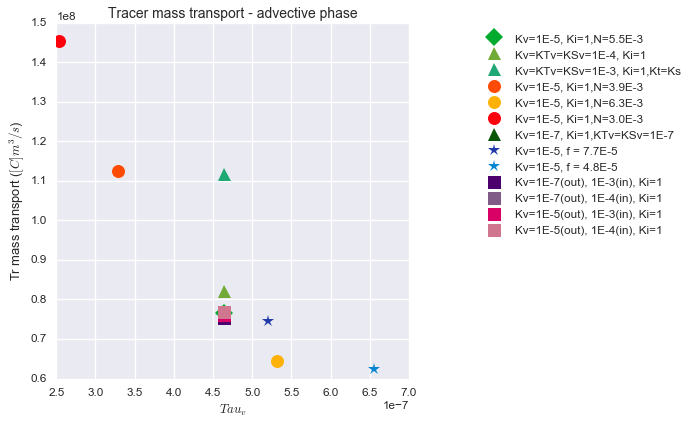

In [23]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(6,6))

jj=0

for ii,ee in zip(indexList,indexHCW):
    
    ax1 = plt.subplot(1,1,1)
    
    plt.plot( Tau_v[ii] ,deltaTrMass[ee], marker[jj], markersize = 13,label = labels[ii])
    plt.ylabel('Tr mass transport ($[C]m^3/s$)')
    plt.xlabel('$Tau_v$')
    plt.title(' Tracer mass transport - advective phase ')
    
    jj = jj+1

plt.tight_layout()
ax1.legend(loc ='upper right', bbox_to_anchor=(1.8,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


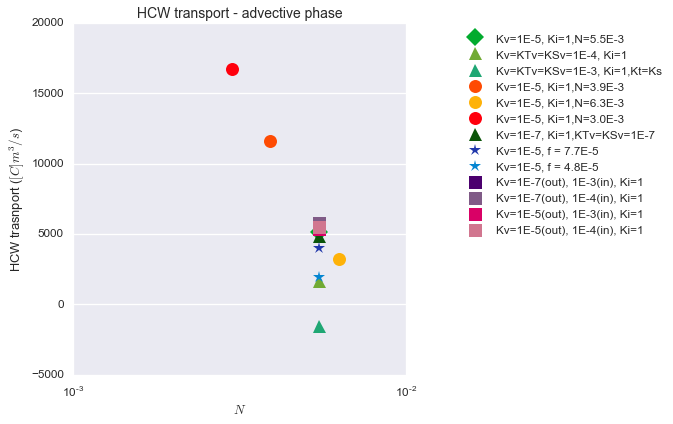

In [24]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(6,6))

jj=0

for ii,ee in zip(indexList,indexHCW):
    
    ax1 = plt.subplot(1,1,1)
    plt.plot( N[ii] ,deltaHCW[ee],marker[jj], markersize = 13,label = labels[ii])
    plt.ylabel('HCW trasnport ($[C]m^3/s$)')
    plt.xlabel('$N$')
    plt.title(' HCW transport - advective phase ')
    ax1.set_xscale("log", nonposy='clip')
    jj = jj+1

plt.tight_layout()
ax1.legend(loc ='upper right', bbox_to_anchor=(1.8,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


The transport of tracer mass onto the shelf is well explained by tau_v except if kv varies, also one run with different f does not come to play.

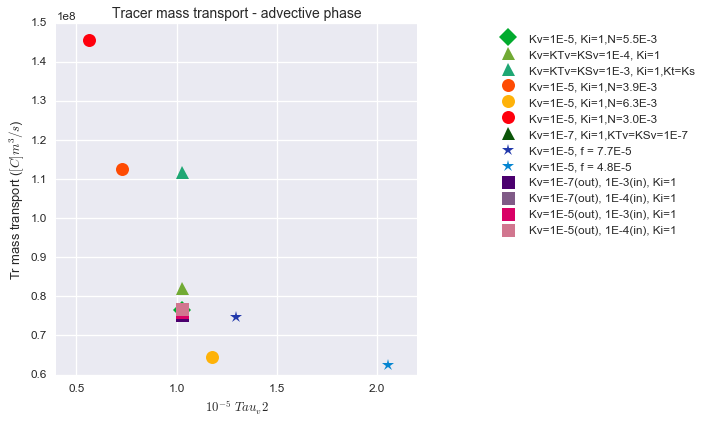

In [27]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(6,6))

jj=0

for ii,ee in zip(indexList,indexHCW):
    
    ax1 = plt.subplot(1,1,1)
    plt.plot(Bu[ii] ,deltaTrMass[ee], marker[jj], markersize = 13,label = labels[ii])
    plt.ylabel('Tr mass transport ($[C]m^3/s$)')
    plt.xlabel('$10^{-5}$ $Tau_v2$')
    plt.title(' Tracer mass transport - advective phase ')
    #ax1.set_xscale("log", nonposy='clip')
    
    jj = jj+1

plt.tight_layout()
ax1.legend(loc ='upper right', bbox_to_anchor=(1.8,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


### HCW

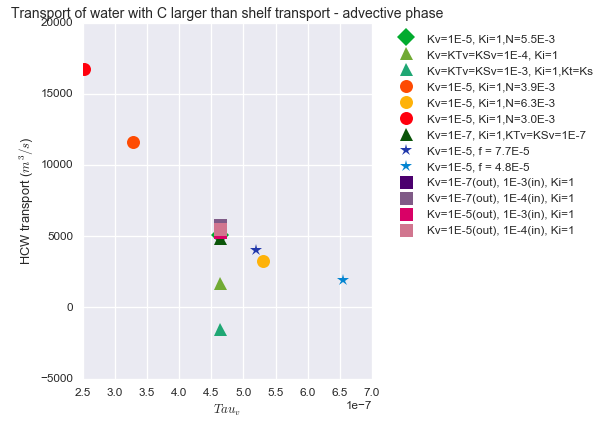

In [31]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(6,6))

jj=0

for ii,ee in zip(indexList,indexHCW):
    
    ax1 = plt.subplot(1,1,1)
    ax1.plot( Tau_v[ii] ,deltaHCW[ee], marker[jj], markersize = 13,label = labels[ii])
    ax1.set_ylabel('HCW transport ($m^3/s$)')
    ax1.set_xlabel('$Tau_v$')
    ax1.set_title(' Transport of water with C larger than shelf transport - advective phase ')
    #ax1.set_xscale("log", nonposy='clip')

    jj = jj+1

plt.tight_layout()
ax1.legend(loc ='upper right', bbox_to_anchor=(1.8,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


## Total transports (CS + vertical)

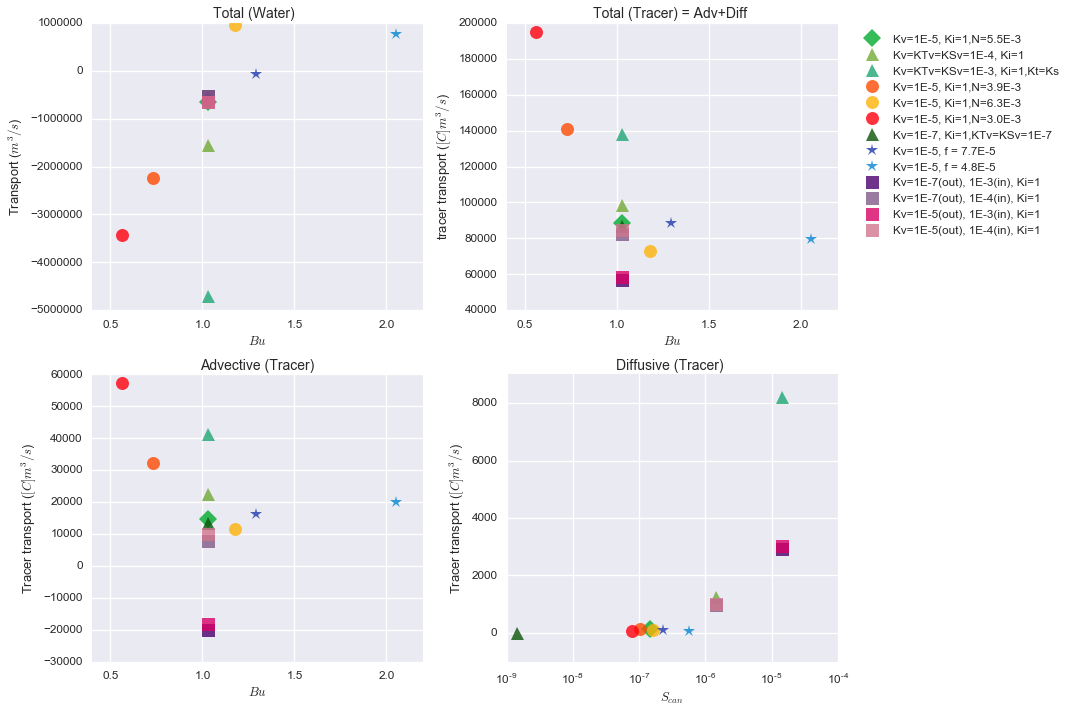

In [35]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(12,10))

jj=0

for ii in indexList:
   
    ax1 = plt.subplot(2,2,1)
    plt.plot(Bu[ii] , np.nanmean(watCrossShelf_effect[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Transport ($m^3/s$)')
    plt.xlabel('$Bu$')
    plt.title('Total (Water)  ')
    

    ax2 = plt.subplot(2,2,2)
    plt.plot(Bu[ii] , np.nanmean(crossShelf_effect[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('tracer transport ($[C]m^3/s$)')
    plt.xlabel('$Bu$')
    plt.title('Total (Tracer) = Adv+Diff ')
    #ax7.set_xscale("log", nonposy='clip')


    ax3 = plt.subplot(2,2,3)
    plt.plot(Bu[ii] , np.nanmean(crossShelf_A_effect[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($[C]m^3/s$)')
    plt.xlabel('$Bu$')
    plt.title('Advective (Tracer)')
   
    ax4 = plt.subplot(2,2,4)
    plt.plot(S_can[ii] ,np.nanmean(crossShelf_D_effect[10:,ii]),marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($[C]m^3/s$)')
    plt.xlabel('$S_{can}$')
    plt.title('Diffusive (Tracer) ')
    ax4.set_xscale("log", nonposy='clip')


    jj = jj+1

plt.tight_layout()
ax2.legend(loc ='upper right', bbox_to_anchor=(1.7,1))

plt.show()


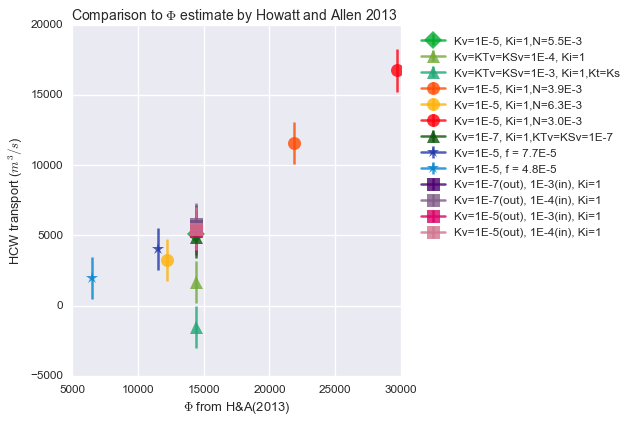

In [41]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(6,6))

jj=0

for ii,ee in zip(indexList,indexHCW):
    
    ax5 = plt.subplot(1,1,1)

    plt.errorbar(Phi_HA[ii],deltaHCW[ee],yerr=errordeltaHCW,marker= marker[ii], markersize = 13,alpha = 0.8,label = labels[ii])
    
    plt.ylabel('HCW transport ($m^3/s$)')
    plt.xlabel('$\Phi$ from H&A(2013)')
    plt.title('Comparison to $\Phi$ estimate by Howatt and Allen 2013  ')
    #ax5.set_xscale("log", nonposy='clip')
    

plt.tight_layout()
ax5.legend(loc ='upper right', bbox_to_anchor=(1.7,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


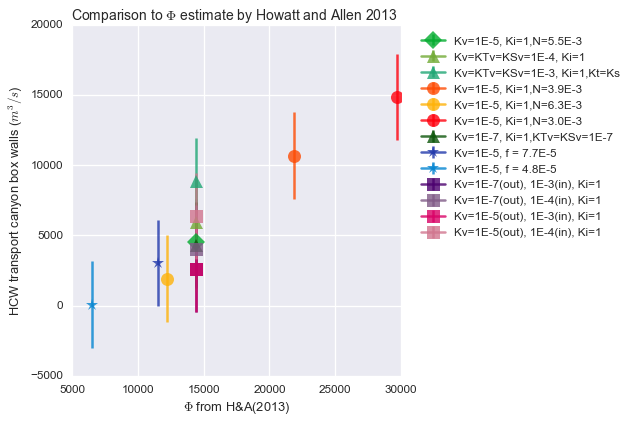

In [43]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(6,6))

jj=0

for ii,ee in zip(indexList,indexHCW):
    
    ax5 = plt.subplot(1,1,1)

    plt.errorbar(Phi_HA[ii],np.nanmean(hcwCS[10:18,ii]+hcw_lid[10:18,ii]),yerr = errorTransHCW,marker=marker[ii], markersize = 13,alpha = 0.8,label = labels[ii])
    
    plt.ylabel('HCW transport canyon box walls ($m^3/s$)')
    plt.xlabel('$\Phi$ from H&A(2013)')
    plt.title('Comparison to $\Phi$ estimate by Howatt and Allen 2013  ')
    #ax5.set_xscale("log", nonposy='clip')
    

plt.tight_layout()
ax5.legend(loc ='upper right', bbox_to_anchor=(1.7,1))
#ax2.legend(loc =0)

plt.show()
#fig42.savefig('results/figures/PevAllMetricsAllShelfAdvPhase.eps', format='eps', dpi=1000, bbox_inches='tight')


### Coastal intrusion

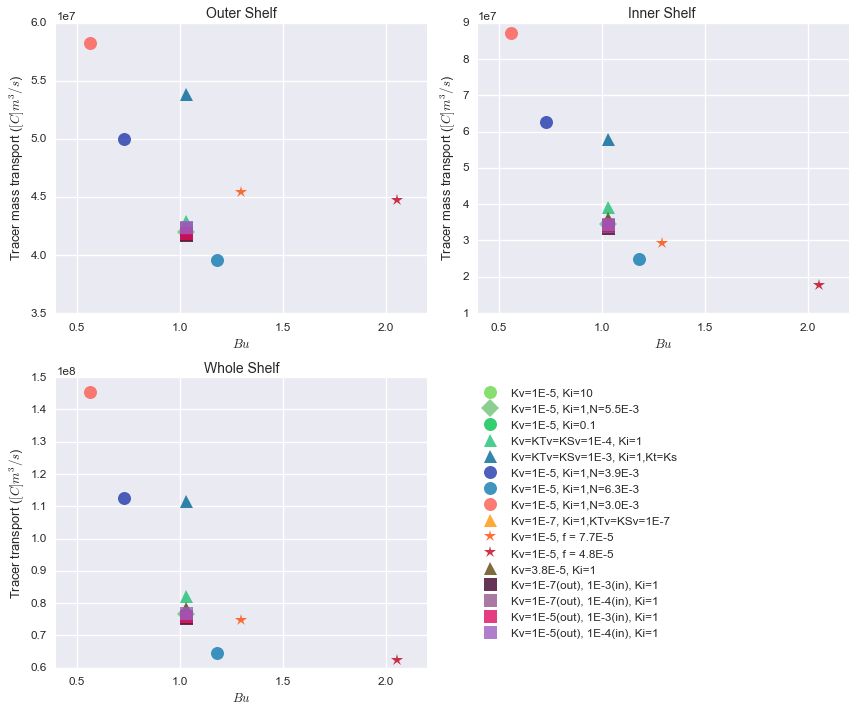

In [74]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(12,10))

jj=0

for ii,ee in zip(indexList,indexEq):
   
    ax1 = plt.subplot(2,2,1)
    plt.plot(Bu[ii] , deltaTrMass_Out[ee],marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer mass transport ($[C]m^3/s$)')
    plt.xlabel('$Bu$')
    plt.title('Outer Shelf')
    #ax1.set_xscale("log", nonposy='clip')


    ax2 = plt.subplot(2,2,2)
    plt.plot(Bu[ii] , deltaTrMass_In[ee],marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer mass transport ($[C]m^3/s$)')
    plt.xlabel('$Bu$')
    plt.title('Inner Shelf ')
    #ax2.set_xscale("log", nonposy='clip')


    ax3 = plt.subplot(2,2,3)
    plt.plot(Bu[ii] , deltaTrMass[ee] ,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('Tracer transport ($[C]m^3/s$)')
    plt.xlabel('$Bu$')
    plt.title('Whole Shelf')
    #ax3.set_xscale("log", nonposy='clip')

    jj = jj+1

plt.tight_layout()
ax3.legend(loc ='upper right', bbox_to_anchor=(1.7,1))

plt.show()


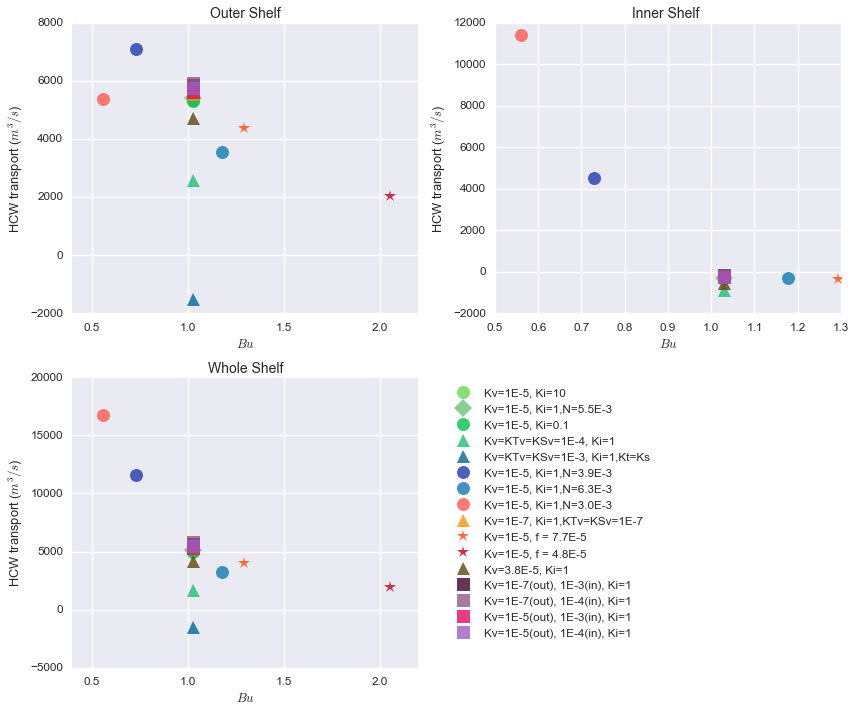

In [75]:
sns.set_context("talk", font_scale=0.9, rc={"lines.linewidth": 2.5})
fig42=plt.figure(figsize=(12,10))

jj=0

for ii,ee in zip(indexList,indexEq):
   
    ax1 = plt.subplot(2,2,1)
    plt.plot(Bu[ii] , deltaHCW_Out[ee],marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('HCW transport ($m^3/s$)')
    plt.xlabel('$Bu$')
    plt.title('Outer Shelf')
    #ax1.set_xscale("log", nonposy='clip')


    ax2 = plt.subplot(2,2,2)
    plt.plot(Bu[ii] , deltaHCW_In[ee],marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('HCW transport ($m^3/s$)')
    plt.xlabel('$Bu$')
    plt.title('Inner Shelf ')
    #ax2.set_xscale("log", nonposy='clip')


    ax3 = plt.subplot(2,2,3)
    plt.plot(Bu[ii] , deltaHCW[ee] ,marker[jj], markersize = 13,alpha = 0.8,label = labels[ii])
    plt.ylabel('HCW transport ($m^3/s$)')
    plt.xlabel('$Bu$')
    plt.title('Whole Shelf')
    #ax3.set_xscale("log", nonposy='clip')

    jj = jj+1

plt.tight_layout()
ax3.legend(loc ='upper right', bbox_to_anchor=(1.7,1))

plt.show()
